In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
concrete_strength = pd.read_csv("../dataset/Concrete_Data.csv")

In [3]:
concrete_strength.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_strength.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


論文によると目的変数と適度に相関のある変数でソートし、high, medium, lowの3グループに分類する(その変数は削除)

In [5]:
# 目的変数(Concrete compressive strength)との相関
concrete_strength.corr().iloc[-1,:].sort_values()

Water  (component 4)(kg in a m^3 mixture)               -0.289633
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167241
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164935
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105755
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134829
Age (day)                                                0.328873
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366079
Cement (component 1)(kg in a m^3 mixture)                0.497832
Concrete compressive strength(MPa, megapascals)          1.000000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

"Superplasticizer"を分割のための変数とする

In [6]:
concrete_strength_sorted = concrete_strength.sort_values("Superplasticizer (component 5)(kg in a m^3 mixture)").reset_index(drop=True)
concrete_strength_sorted

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3,14.70
1,200.0,133.0,0.0,192.0,0.0,965.4,806.2,28,30.44
2,250.2,166.8,0.0,203.5,0.0,977.6,694.1,3,9.73
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32
4,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,3,14.40
...,...,...,...,...,...,...,...,...,...
1025,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.20
1026,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.30
1027,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.90
1028,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.90


111


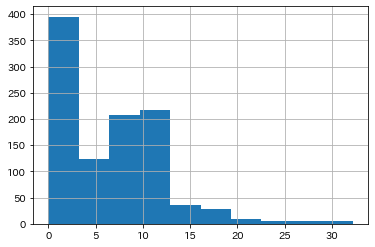

In [7]:
# "Superplasticizerが同じ値ばっかりになってそうなのでuniqueの数をチェック
print(len(concrete_strength["Superplasticizer (component 5)(kg in a m^3 mixture)"].unique()))
# concrete_strength["Superplasticizer (component 5)(kg in a m^3 mixture)"].value_counts()
concrete_strength["Superplasticizer (component 5)(kg in a m^3 mixture)"].hist()

左に寄ったグラフだけど大丈夫かな？

In [8]:
low = concrete_strength_sorted[:len(concrete_strength_sorted)//3]
medium = concrete_strength_sorted[len(concrete_strength_sorted)//3: (len(concrete_strength_sorted)//3)*2]
high = concrete_strength_sorted[(len(concrete_strength_sorted)//3)*2:]

In [9]:
low

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3,14.70
1,200.0,133.0,0.0,192.0,0.0,965.4,806.2,28,30.44
2,250.2,166.8,0.0,203.5,0.0,977.6,694.1,3,9.73
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32
4,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,3,14.40
...,...,...,...,...,...,...,...,...,...
338,380.0,95.0,0.0,228.0,0.0,932.0,594.0,90,40.56
339,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
340,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90,39.36
341,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90,52.91


In [10]:
medium

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
343,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
344,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
345,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
346,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
347,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
...,...,...,...,...,...,...,...,...,...
681,147.0,115.0,89.0,202.0,9.0,860.0,829.0,28,19.99
682,280.0,129.0,100.0,172.0,9.0,825.0,805.0,28,52.82
683,326.0,166.0,0.0,174.0,9.0,882.0,790.0,28,61.23
684,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28,44.28


In [11]:
high

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
686,356.0,119.0,0.0,160.0,9.0,1061.0,657.0,28,59.00
687,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28,18.28
688,272.8,105.1,81.8,209.7,9.0,904.0,679.7,28,37.17
689,500.0,0.0,0.0,151.0,9.0,1033.0,655.0,28,69.84
690,155.0,0.0,143.0,193.0,9.0,1047.0,697.0,28,12.46
...,...,...,...,...,...,...,...,...,...
1025,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.20
1026,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.30
1027,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.90
1028,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.90


In [12]:
def split_dataset(df, split_value):
    df_sorted = df.sort_values(split_value).reset_index(drop=True)
    low = df_sorted[:len(df_sorted)//3]
    medium = df_sorted[len(df_sorted)//3: (len(df_sorted)//3)*2]
    high = df_sorted[(len(df_sorted)//3)*2:]
    
    return low, medium, high

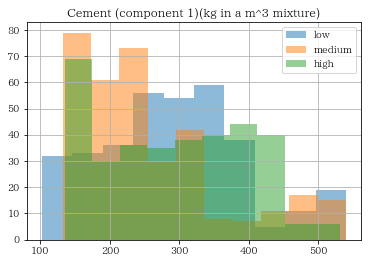

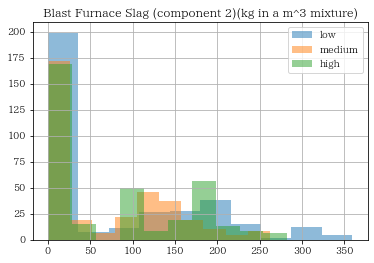

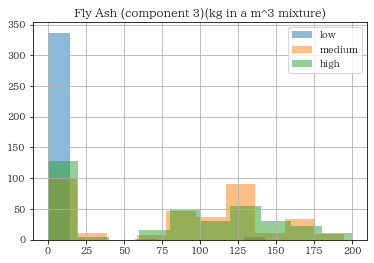

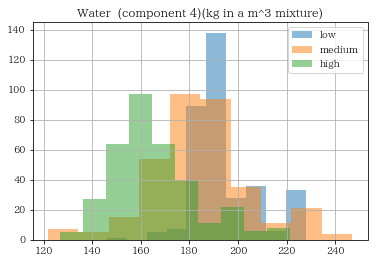

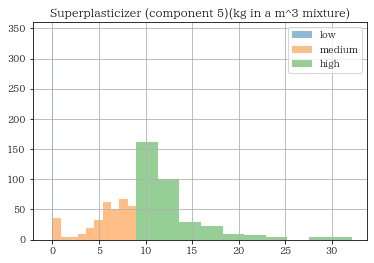

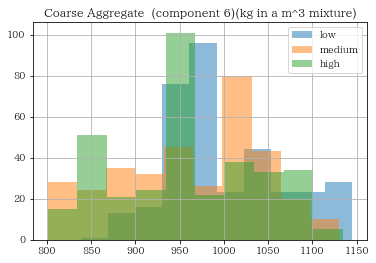

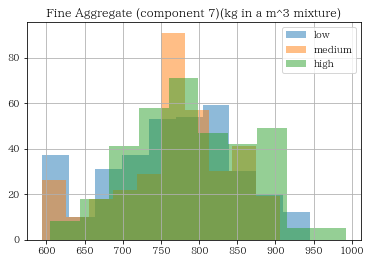

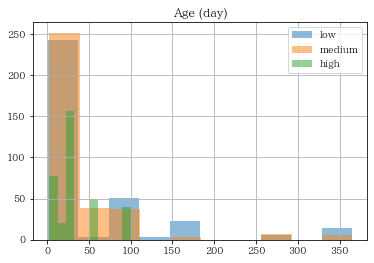

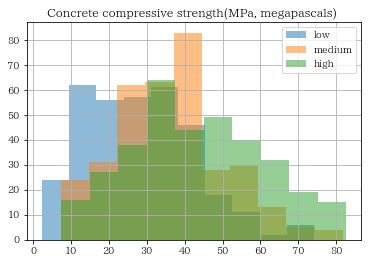

In [26]:
for (l,m, h) in zip(low.iteritems(), medium.iteritems(), high.iteritems()):
    if l[0] == m[0] == h[0]:
        pass
    else:
        raise
    l[1].hist(alpha=.5)
    m[1].hist(alpha=.5)
    h[1].hist(alpha=.5)
    plt.title(l[0])
    plt.legend(["low", "medium", "high"])
    plt.show()